<a href="https://colab.research.google.com/github/anshudabar/INSE6220/blob/main/PCA_RiceSeeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Principal Component Analysis and classification of Rice seed data**

Importing Libraries

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Installing Pycaret

In [180]:
!pip install pycaret

**Dataset Description:**

The dataset utilized in this analysis pertains to Rice Seed Data, encompassing a diverse array of genetic varieties of rice. With its global significance as one of the most cultivated grain crops, rice exhibits a multitude of genetic differentiations. These differentiations, attributed to distinct features, enable the classification and assessment of seed quality. Comprising 12 attributes, this dataset correlates these distinguishing features with the classification of rice seeds. In this investigation, five specific rice varieties – Jasmine, Basmati, Ipsala, Karacadag, and Arborio – each consisting of 1336 randomly selected elements, were scrutinized. These elements were labeled with attributes such as area, perimeter, and aspect ratio, among others. Utilizing Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms, models were developed for feature extraction and classification processes.

The dataset is applicable for tasks including the classification of rice varieties and cluster analysis, facilitating the evaluation of seed quality.

Attribute Information:

In the construction of the dataset, ten geometric parameters and attributes of rice seeds were meticulously measured:

- AREA
- PERIMETER
- MAJOR_AXIS
- MINOR_AXIS
- ECCENTRICITY
- EQDIASQ
- SOLIDITY
- CONVEX_AREA
- EXTENT
- ASPECT_RATIO
- ROUNDNESS
- CLASS

https://www.muratkoklu.com/datasets

https://doi.org/10.1016/j.compag.2021.106285

https://doi.org/10.15316/SJAFS.2021.252




Reading the Dataset File


In [181]:
# Reading the csv file from raw content
df = pd.read_csv('https://raw.githubusercontent.com/anshudabar/INSE6220/main/dataset.csv')

# Displaying top 50 entries of the dataframe
df.head(50)


AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    7805    437.915    209.8215     48.0221        0.9735   99.6877   
1    7503    340.757    138.3361     69.8417        0.8632   97.7400   
2    5124    314.617    141.9803     46.5784        0.9447   80.7718   
3    7990    437.085    201.4386     51.2245        0.9671  100.8622   
4    7433    342.893    140.3350     68.3927        0.8732   97.2830   
5   11648    445.527    178.4659     84.9327        0.8795  121.7813   
6    7621    450.325    219.0981     45.2301        0.9785   98.5056   
7    8582    367.338    146.6128     75.5406        0.8570  104.5320   
8    5450    320.362    139.9963     50.6910        0.9321   83.3016   
9    6781    307.023    116.2443     74.8093        0.7654   92.9184   
10   9656    451.287    206.7047     60.2333        0.9566  110.8801   
11   8460    362.862    149.4804     72.9154        0.8730  103.7864   
12   7090    401.778    190.9745     47.8482        0.9681   95.0119   
13   6208    300.124    113.9325     70.6069        0.7848   88.9060   
14   7116    411.103    197.0442     46.7342        0.9715   95.1860   
15   6276    288.886    108.0128     74.3469        0.7254   89.3916   
16   5832    282.750    108.9852     68.6358        0.7768   86.1715   
17   6628    311.431    119.7466     72.0507        0.7987   91.8642   
18   5251    327.214    151.2670     45.0754        0.9546   81.7666   
19  12769    447.830    184.4764     88.6296        0.8770  127.5068   
20   5392    326.326    142.1714     48.9332        0.9389   82.8572   
21  14835    488.965    196.5303     97.3891        0.8686  137.4355   
22   9475    408.427    178.9363     67.5776        0.9259  109.8360   
23   7244    412.703    194.9039     48.1895        0.9690   96.0383   
24   6672    332.842    136.3604     63.4366        0.8852   92.1686   
25   5036    319.789    148.3850     43.7762        0.9555   80.0752   
26   7725    344.792    140.6425     71.0416        0.8630   99.1755   
27   7059    311.879    117.4605     77.1780        0.7538   94.8040   
28  12849    456.372    188.4676     88.1827        0.8838  127.9056   
29  14883    485.363    203.2395     94.3304        0.8858  137.6576   
30  13545    470.587    198.7273     88.0138        0.8966  131.3241   
31   7861    428.946    205.9345     49.3783        0.9708  100.0447   
32   6725    299.134    111.9660     76.8770        0.7270   92.5340   
33   6397    295.966    113.3151     72.3246        0.7698   90.2492   
34   8064    409.885    187.1649     55.6706        0.9547  101.3282   
35   5712    294.296    119.3921     61.5237        0.8570   85.2804   
36   8067    364.494    143.7799     73.1595        0.8609  101.3470   
37   5552    322.510    145.3257     49.3973        0.9405   84.0775   
38   5209    315.719    143.1193     46.6790        0.9453   81.4390   
39  13084    460.910    190.8731     88.5734        0.8858  129.0700   
40   7366    335.637    134.2082     71.0497        0.8484   96.8436   
41  12501    451.281    185.8183     87.0528        0.8835  126.1617   
42   7439    342.517    140.0552     68.8307        0.8709   97.3223   
43  15917    515.441    212.7014     97.5204        0.8887  142.3592   
44   5562    324.595    148.1419     48.3881        0.9452   84.1532   
45   7003    334.538    141.5161     63.4151        0.8940   94.4272   
46  14106    476.343    196.1112     92.5838        0.8815  134.0161   
47   7096    317.385    121.1335     75.7785        0.7802   95.0521   
48   8900    451.938    213.6859     53.6702        0.9679  106.4511   
49  14301    480.164    187.6669     99.3781        0.8483  134.9392   

    SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS      CLASS  
0     0.9775         7985  0.3547        4.3693     0.5114    Basmati  
1     0.9660         7767  0.6637        1.9807     0.8120    Arborio  
2     0.9721         5271  0.4760        3.0482     0.6505    Jasmine  
3     0.9659         8272  0.6274        3.9

Generate pairwise relationship plot

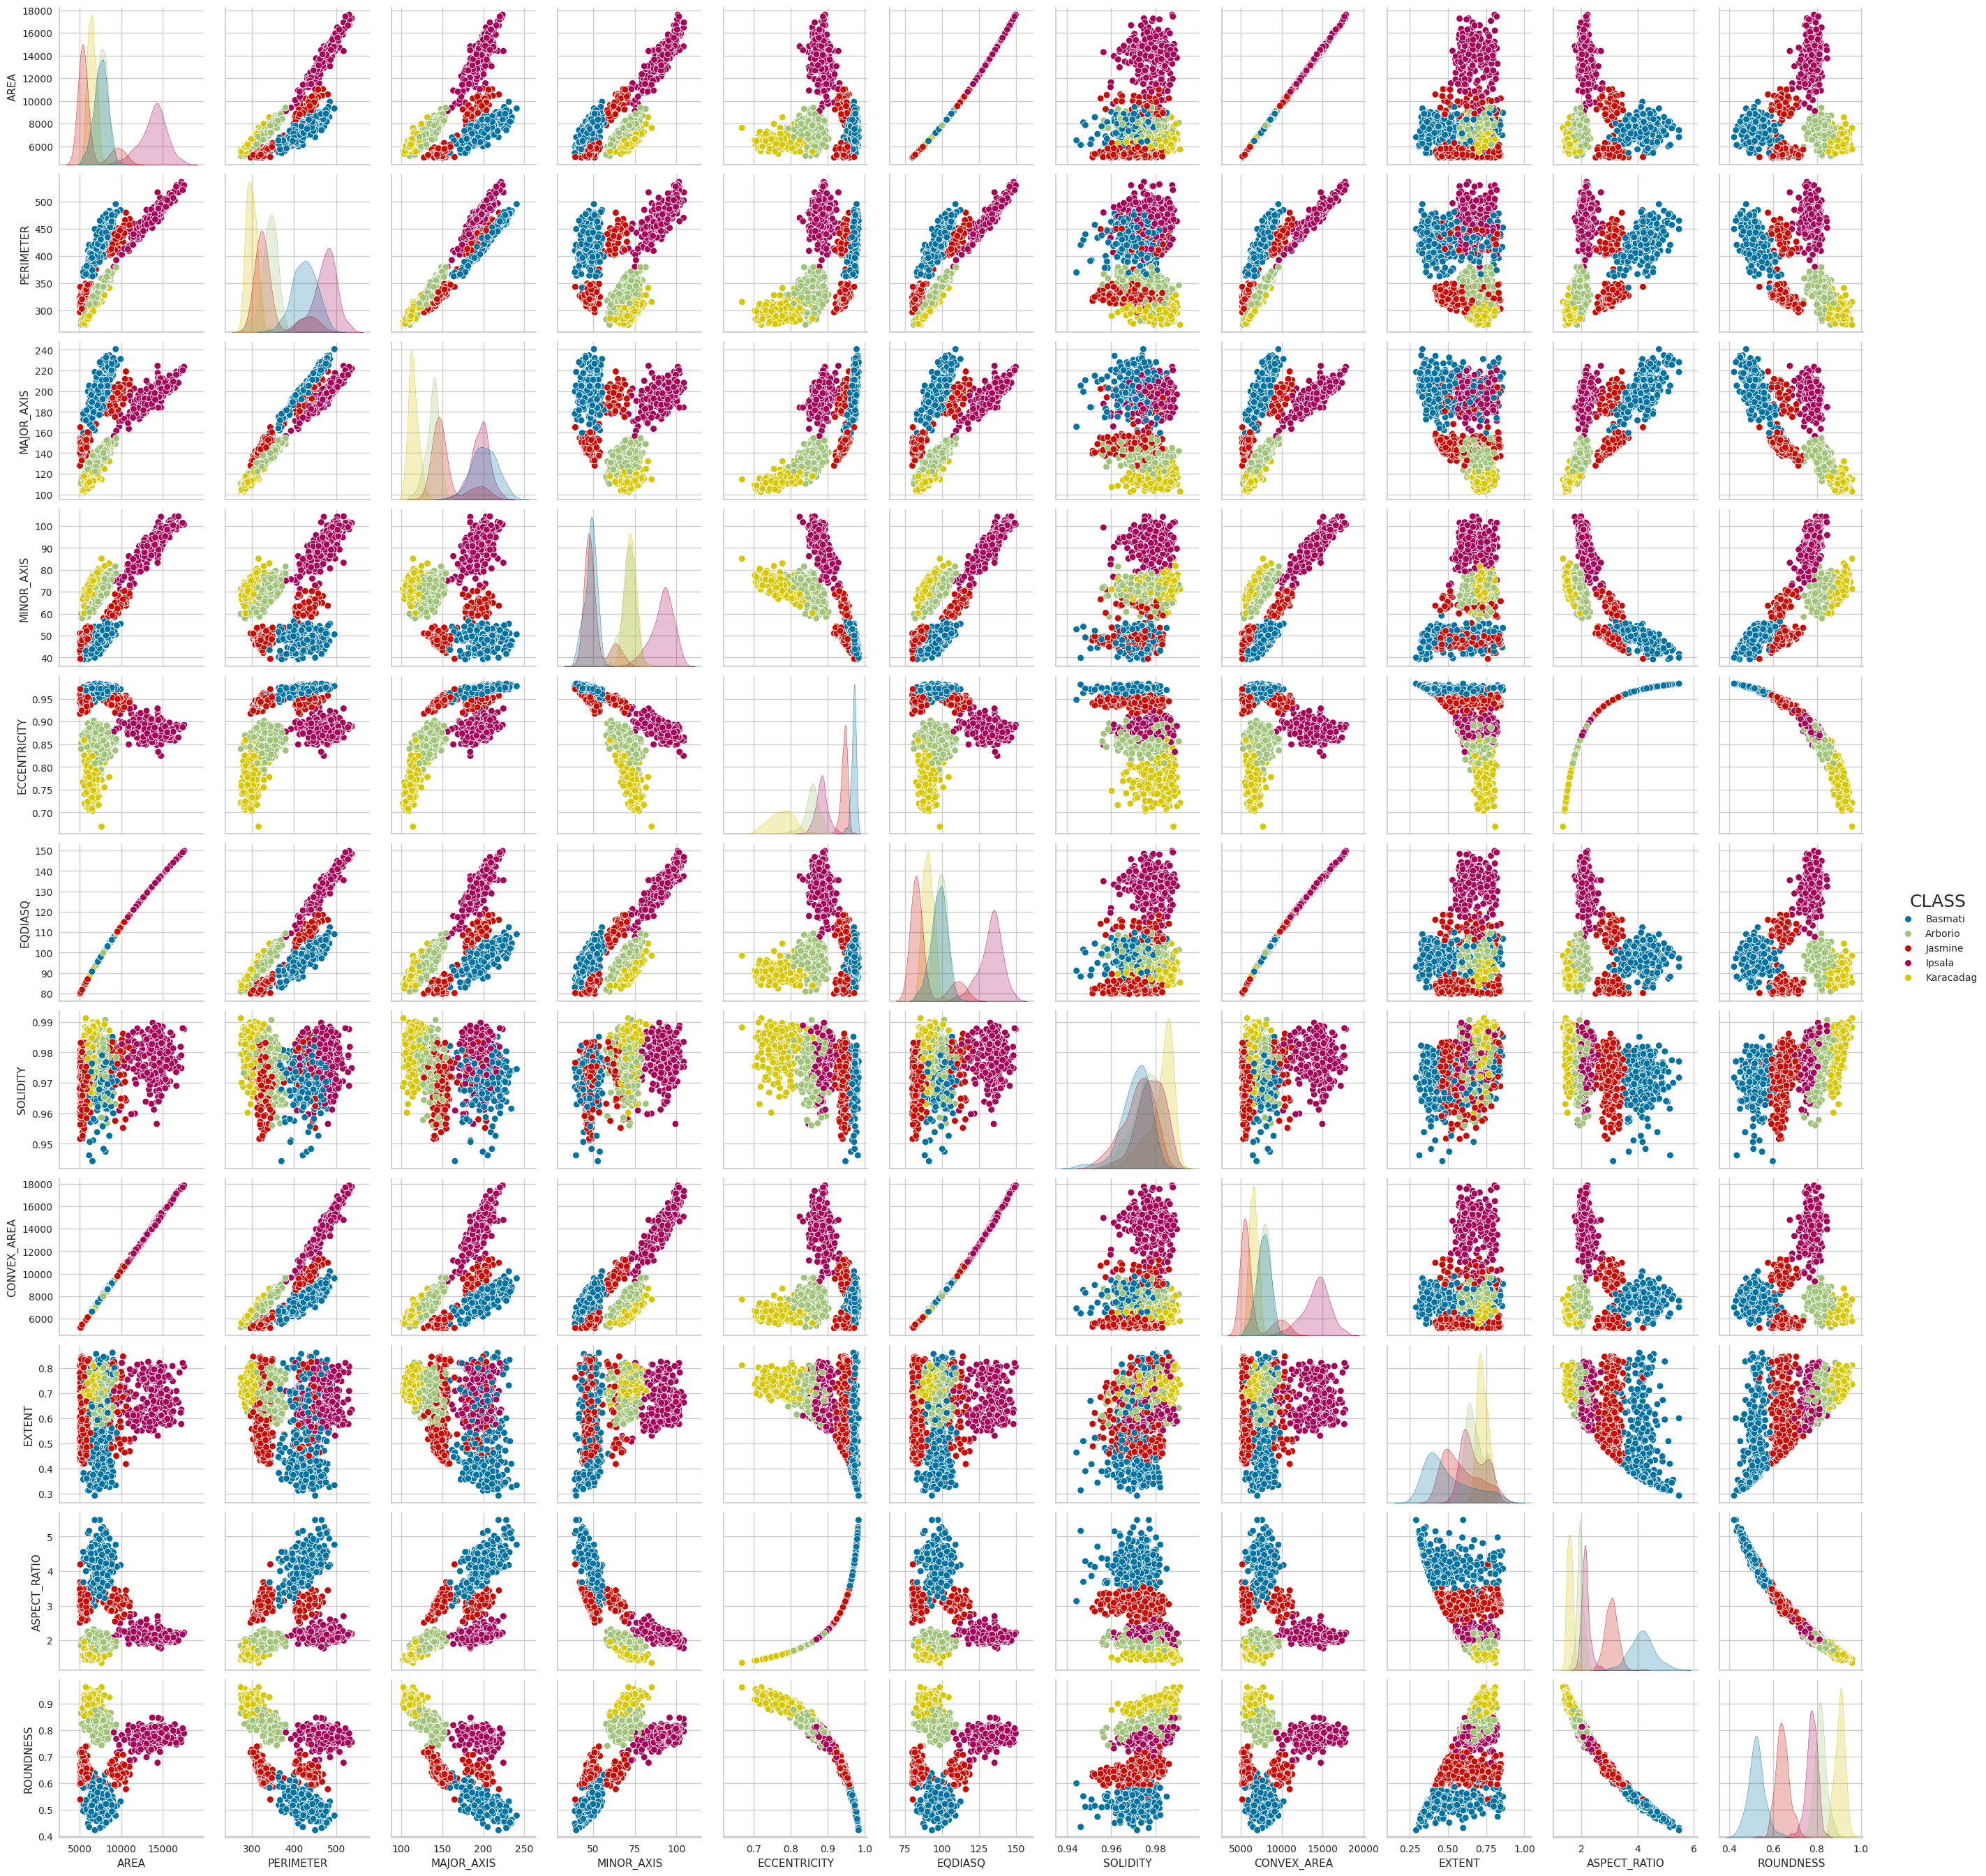

In [182]:
# Plot pairwise relationships in the DataFrame `df`, where each pair of variables is plotted against each other.
# The `hue` parameter is set to 'CLASS', which means that the data points will be color-coded based on the values in the 'CLASS' column.
sns.pairplot(df, hue='CLASS')

# Display the plot.
plt.show()

# **Data analysis**

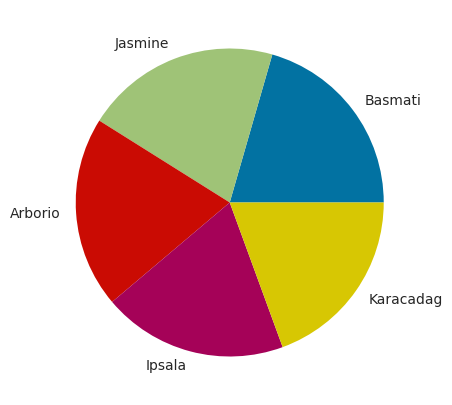

In [183]:
# Extract the target variable 'CLASS' from the DataFrame `df` and assign it to the variable `y`.
y = df['CLASS']

# Generate a pie chart representing the distribution of values in the target variable.
# The `value_counts()` method counts the occurrences of each unique value in `y`, and `plot(kind='pie')` creates a pie chart.
y.value_counts().plot(kind='pie')

# Remove the y-axis label from the plot to make it cleaner.
plt.ylabel('')

# Display the pie chart.
plt.show()

# **Data standardization**

In [184]:
# Extract features from the DataFrame `df` by dropping the 'CLASS' column and store them in the variable `X`.
X = df.drop(columns=['CLASS'])

# Display the first 10 rows of the feature DataFrame `X` for quick inspection.
X.head(10)

# Standardize the features in `X` using StandardScaler to scale them to have a mean of 0 and standard deviation of 1.
Xs = StandardScaler().fit_transform(X)

# Store the column names of the standardized features before converting to DataFrame.
Xcols = X.columns

# Convert the standardized features array `Xs` back to a DataFrame with original column names.
X = pd.DataFrame(Xs)

# Assign the original column names to the standardized DataFrame `X`.
X.columns = Xcols

# Display the first 10 rows of the standardized feature DataFrame `X` after standardization.
X.head(10)

# Generate summary statistics (mean, standard deviation, min, max, etc.) for each column in the standardized feature DataFrame `X`.
# Transpose the summary statistics for better readability.
X.describe().transpose()


count          mean       std       min       25%       50%  \
AREA          1334.0  2.916208e-16  1.000375 -1.075337 -0.701860 -0.310853   
PERIMETER     1334.0  5.865706e-16  1.000375 -1.495475 -0.845591 -0.355554   
MAJOR_AXIS    1334.0  3.568693e-16  1.000375 -1.652953 -0.755183 -0.331384   
MINOR_AXIS    1334.0 -1.810978e-16  1.000375 -1.643286 -1.019570  0.160673   
ECCENTRICITY  1334.0  7.243914e-16  1.000375 -3.064797 -0.538857 -0.007024   
EQDIASQ       1334.0  5.772494e-16  1.000375 -1.217981 -0.726695 -0.259098   
SOLIDITY      1334.0 -1.714770e-14  1.000375 -4.092487 -0.614866  0.045525   
CONVEX_AREA   1334.0  1.557974e-16  1.000375 -1.075976 -0.715946 -0.322224   
EXTENT        1334.0 -1.145178e-16  1.000375 -2.698327 -0.580159  0.196747   
ASPECT_RATIO  1334.0 -4.234494e-16  1.000375 -1.307603 -0.741020 -0.458843   
ROUNDNESS     1334.0 -2.929524e-16  1.000375 -2.235275 -0.791664  0.305641   

                   75%       max  
AREA          0.157324  3.055762  
PERIMETER     0.921568  2.318002  
MAJOR_AXIS    0.974845  2.220133  
MINOR_AXIS    0.542404  2.295039  
ECCENTRICITY  0.885206  1.344117  
EQDIASQ       0.253191  2.765620  
SOLIDITY      0.761218  2.010429  
CONVEX_AREA   0.161667  2.998266  
EXTENT        0.739847  1.814127  
ASPECT_RATIO  0.631765  2.975775  
ROUNDNESS     0.729612  1.678863

# Some plots

[Text(0, 0, 'AREA'),
 Text(1, 0, 'PERIMETER'),
 Text(2, 0, 'MAJOR_AXIS'),
 Text(3, 0, 'MINOR_AXIS'),
 Text(4, 0, 'ECCENTRICITY'),
 Text(5, 0, 'EQDIASQ'),
 Text(6, 0, 'SOLIDITY'),
 Text(7, 0, 'CONVEX_AREA'),
 Text(8, 0, 'EXTENT'),
 Text(9, 0, 'ASPECT_RATIO'),
 Text(10, 0, 'ROUNDNESS')]

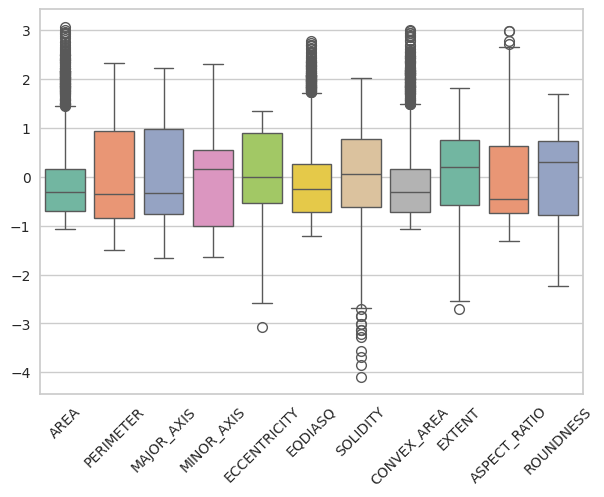

In [185]:
# Create a new figure for the boxplot visualization.
ax = plt.figure()

# Generate a boxplot of the features in DataFrame `X`, orienting the boxes vertically.
# The palette "Set2" is used to specify the color scheme.
ax = sns.boxplot(data=X, orient="v", palette="Set2")

# Rotate the x-axis tick labels by 45 degrees for better readability.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'AREA'),
 Text(1, 0, 'PERIMETER'),
 Text(2, 0, 'MAJOR_AXIS'),
 Text(3, 0, 'MINOR_AXIS'),
 Text(4, 0, 'ECCENTRICITY'),
 Text(5, 0, 'EQDIASQ'),
 Text(6, 0, 'SOLIDITY'),
 Text(7, 0, 'CONVEX_AREA'),
 Text(8, 0, 'EXTENT'),
 Text(9, 0, 'ASPECT_RATIO'),
 Text(10, 0, 'ROUNDNESS')]

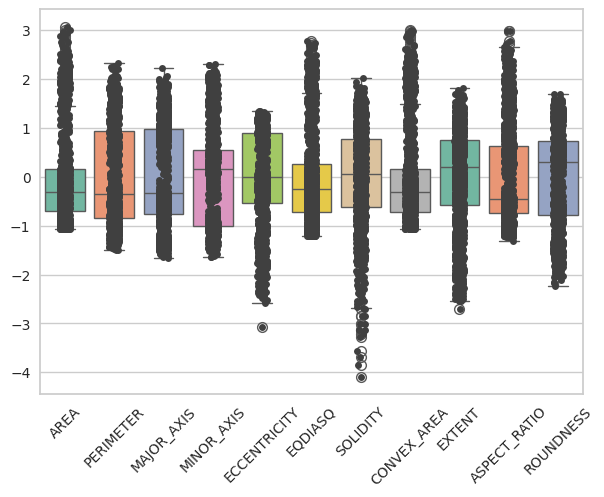

In [186]:
# Create a new figure for the combined boxplot and stripplot visualization.
ax = plt.figure()

# Generate a boxplot of the features in DataFrame `X`, orienting the boxes vertically, and using the palette "Set2".
ax = sns.boxplot(data=X, orient="v", palette="Set2")

# Overlay a stripplot of the features in DataFrame `X` to display individual data points.
# The color ".25" specifies the color of the stripplot.
ax = sns.stripplot(data=X, color=".25")

# Rotate the x-axis tick labels by 45 degrees for better readability.
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


## **Correlation matrix**

[Text(0.5, 1, 'AREA'),
 Text(1.5, 1, 'PERIMETER'),
 Text(2.5, 1, 'MAJOR_AXIS'),
 Text(3.5, 1, 'MINOR_AXIS'),
 Text(4.5, 1, 'ECCENTRICITY'),
 Text(5.5, 1, 'EQDIASQ'),
 Text(6.5, 1, 'SOLIDITY'),
 Text(7.5, 1, 'CONVEX_AREA'),
 Text(8.5, 1, 'EXTENT'),
 Text(9.5, 1, 'ASPECT_RATIO'),
 Text(10.5, 1, 'ROUNDNESS')]

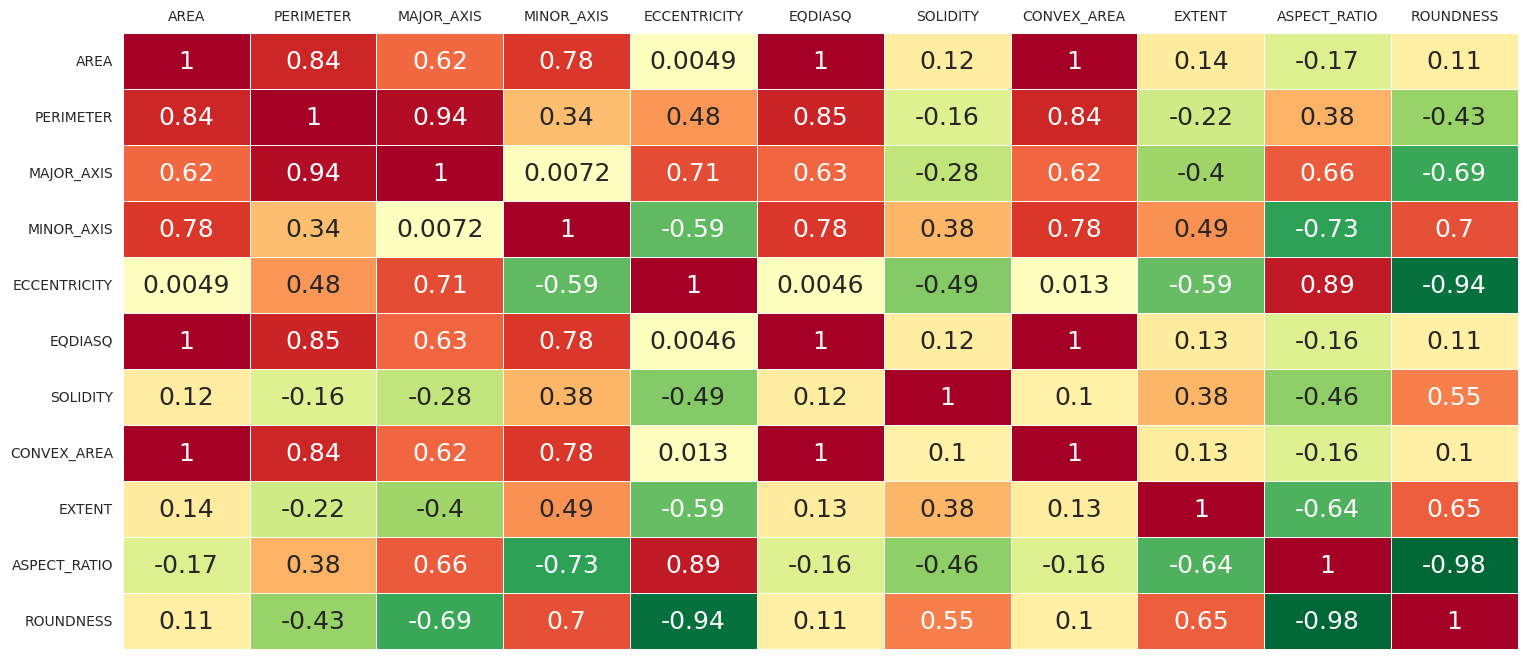

In [187]:
plt.figure(figsize=(18, 8))  # Adjust the width and height

# Generate the heatmap with appropriate settings
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False)

# Rotate the y-axis tick labels to horizontal orientation for better readability
plt.yticks(rotation=0)

# Show only the top x-axis tick labels to prevent overlapping
ax.tick_params(labelbottom=False, labeltop=True)

# Rotate the x-axis tick labels to horizontal orientation for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# **Principal Component Analysis**

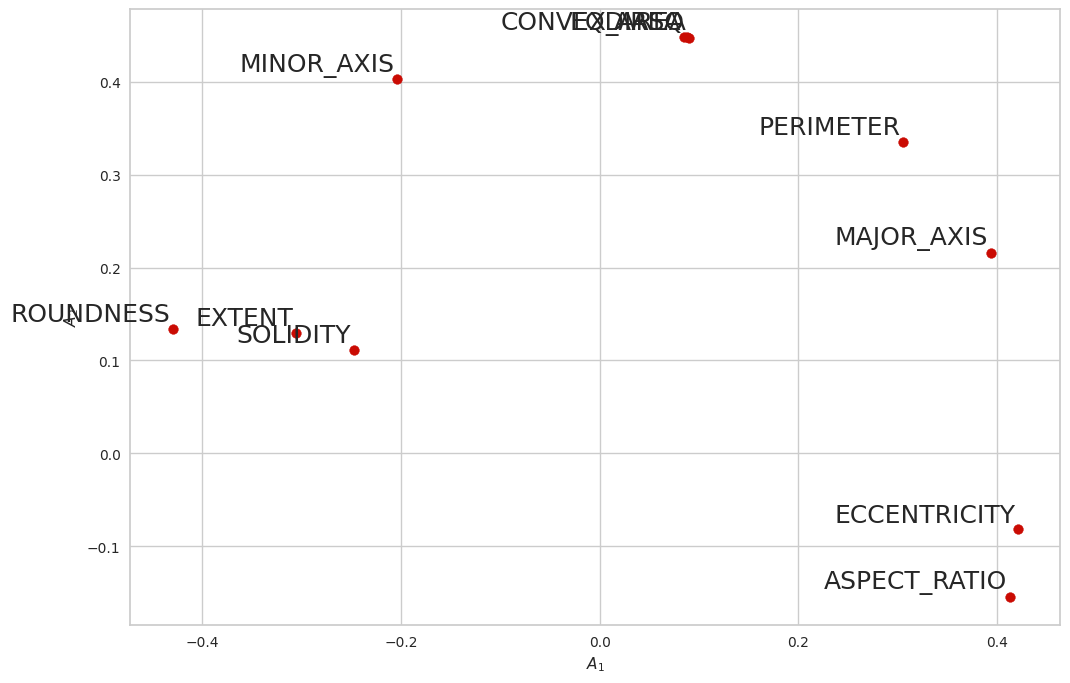

In [188]:
pca = PCA()
Z = pca.fit_transform(X)
A = pca.components_.T
variables = df.columns
plt. figure(figsize=(12,8))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

Eigen Vector

In [189]:
from sympy import Matrix, init_printing
init_printing()
display(Matrix(A))

⎡0.0852033192640801   0.447953197243467   0.0281885324937445   -0.032354222197
⎢                                                                             
⎢0.305430518936337    0.335210790107478   -0.0412521092523481  0.0411741408373
⎢                                                                             
⎢ 0.39358628401696    0.216026007150064    -0.12291282957038    0.104444555963
⎢                                                                             
⎢-0.20409984713912     0.4025832637627     0.125790925984996    -0.13667275108
⎢                                                                             
⎢0.421042067101057   -0.0818013190341918  -0.0826596021828805   0.197631630259
⎢                                                                             
⎢0.0879219479833402   0.448134976186696   0.0220980747770056   -0.028210014009
⎢                                                                             
⎢-0.247598847946246   0.111593745434684   -0.9555966

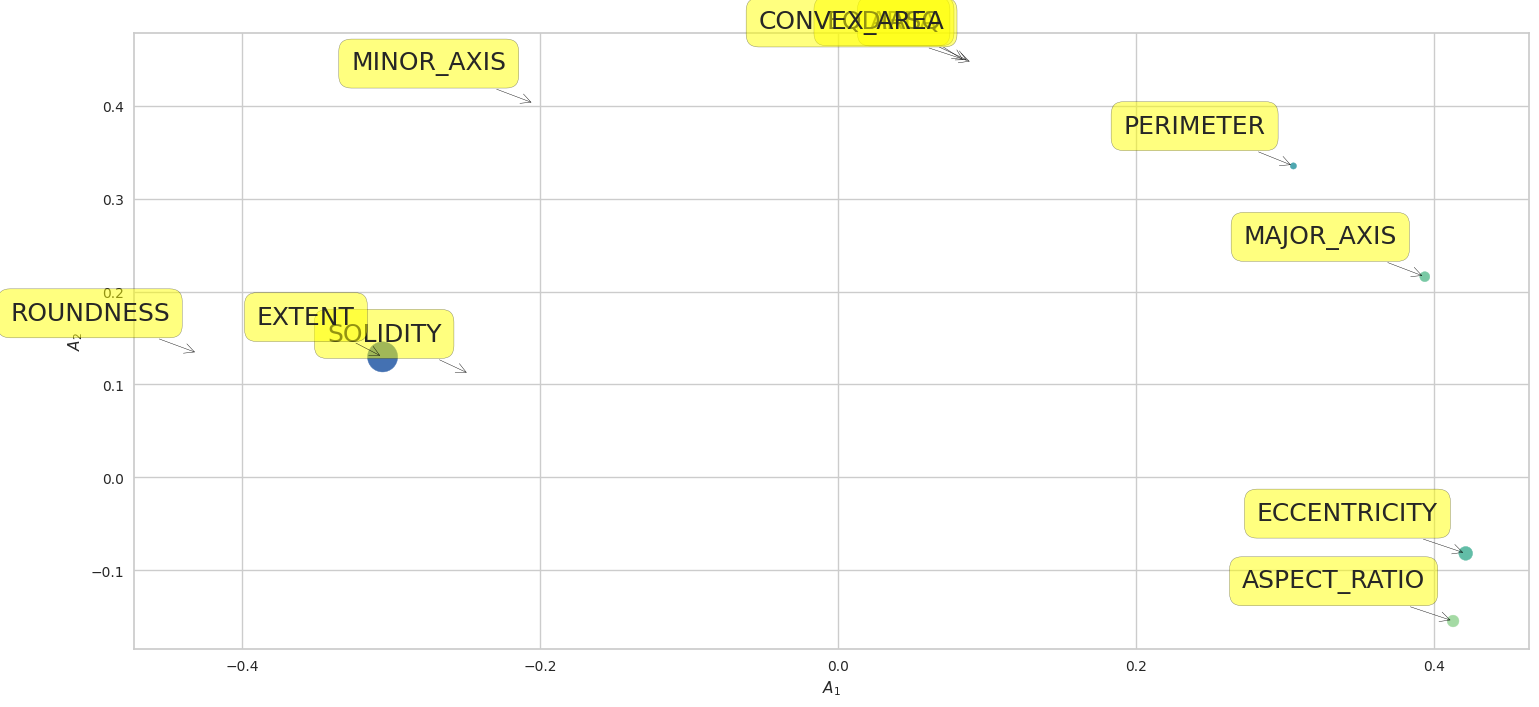

In [190]:
plt.figure(figsize=(18, 8))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->',color='black', connectionstyle='arc3,rad=0'))

**Scree Plot**

[4.84915647e+00 4.78765156e+00 7.03780066e-01 5.25469105e-01
 1.23878164e-01 9.52804001e-03 5.02312400e-03 3.31855925e-03
 3.13353707e-04 1.15513574e-04 1.81038108e-05]


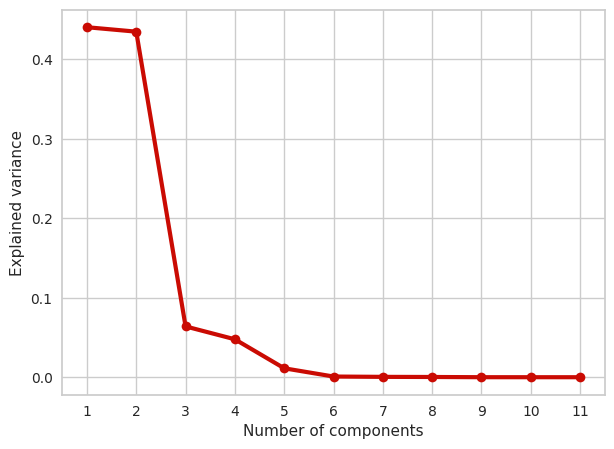

In [191]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
print(Lambda)

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

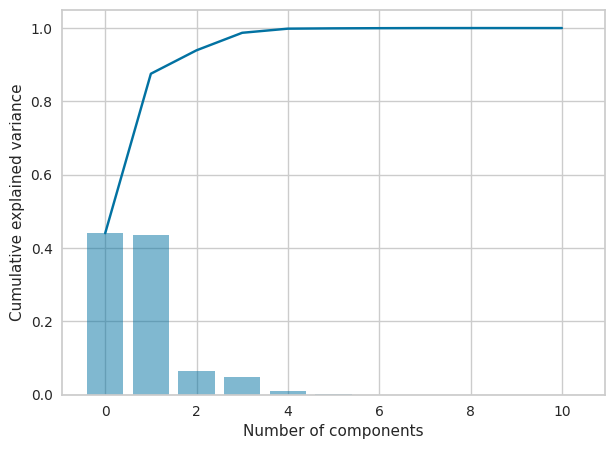

In [192]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# **Using PCA Library**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

# PrincipaL Components
out['PC']

**Scatter Plot**

In [ ]:
model.scatter(label=True, legend=False)

**Eigen Vectors**

In [ ]:
A = out['loadings'].T
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

In [ ]:
model.plot();

**Biplot**

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
model.biplot3d(legend=False)

# **Classification Algorithms**

In [ ]:
#Data for modelling
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Environment Setup

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='CLASS', train_size=0.7, session_id=123)

# Comparing differnt models

In [203]:
 best_model = compare_models()

Initiated  . . . . . . . . . . . . . . . . . .                   19:41:19
Status     . . . . . . . . . . . . . . . . . .           Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Extreme Gradient Boosting

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Best model

In [204]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

For the remainder of this tutorial, we'll focus on the following models as our candidates. These selections are made for illustrative purposes and don't imply they are the best-performing or most suitable for this dataset:


*   Extra Trees Classifier('et')
*   K-Nearest Neighbor Classifier ('knn')
*   Quadratic Discriminant Analysis ('qda')
*   Naive Bayes ('nb')








Creating and Tuning the model


In [ ]:
etc = create_model('et')
etc



Initiated  . . . . . . . . . . . . . . . . . .                19:42:43
Status     . . . . . . . . . . . . . . . . . .        Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Extra Trees Classifier

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_etc = tune_model(etc)
tuned_etc

Analyzing model performances

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
evaluate_model(tuned_etc)

**K-Nearest Neighbour Classification**

In [ ]:
knn = create_model('knn')

Evaluate the model after tuning

In [ ]:
tuned_knn = tune_model(knn)
evaluate_model(tuned_knn)

**Quadratic Discriminant Analysis**

In [ ]:
qda = create_model('qda')

Evaluate Model after tuning

In [ ]:
tuned_qda = tune_model(qda)
evaluate_model(tuned_qda)

**Naive Bayes Classification**

In [ ]:
nb = create_model('nb')

Evaluate the model after tuning

In [ ]:
tuned_nb = tune_model(nb)
evaluate_model(tuned_nb)

**Tune Best Model**

In [ ]:
tuned_best_model = tune_model(best_model)
tuned_best_model

# **Classification and PCA**

In [ ]:
clf_pca = setup(data=data, target='CLASS', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

**Comparing Models**

In [ ]:
best_model_pca = compare_models()

**Best Model PCA**

In [ ]:
best_model_pca

**Tune and evaluate the best model**

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)
tuned_best_model_pca
evaluate_model(tuned_best_model_pca)

In [ ]:
rf_pca = create_model('rf')

**Tune and evaluate Random Forest model**

In [ ]:
tuned_rf_pca = tune_model(rf_pca)
tuned_rf_pca
evaluate_model(tuned_rf_pca)

**Extreme Gradient Boosting Model**

In [ ]:
xgboost_pca = create_model('xgboost')

**Tune and evaluate**

In [ ]:
tuned_xgboost_pca = tune_model(xgboost_pca)
tuned_xgboost_pca
evaluate_model(tuned_xgboost_pca)

**Extra Trees Classifier Model**

In [ ]:
etc_pca = create_model('et')

**Tune and Evaluate**

In [ ]:
tuned_etc_pca = tune_model(etc_pca)
tuned_etc_pca
evaluate_model(tuned_etc_pca)